In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from tpot import TPOTRegressor
import warnings

/home/williamjwall/.pyenv/versions/3.10.6/envs/aquaverti/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
df_air = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Air Data.csv')

In [3]:
# df_air['Température 1 (◦C)'].value_counts()

In [4]:
# df_air.columns

In [5]:
df_g1 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Groupe 1 (Twr 1,2,3,4).csv', low_memory=False)
df_g1.columns = df_g1.iloc[0] 
df_g1 = df_g1[1:]

In [6]:
print(df_g1.columns)
print(f'\n length: {len(df_g1.columns)}')
print(len(df_g1))

Index([                  'Date',       'nutriments (S21)',
                     'Avg. E.C',       'Water Temp (S22)',
               'Avg. TEMP (°F)',               'pH (S23)',
                      'Avg. pH', 'twr  level (in " S31) ',
         'Avg. Tower Level (")',           'Dissolved O2',
                'Avg. DO (ppm)',        'Flowswitch (D1)',
              'tower valv (R1)',        'tower pump (R2)',
              'Lvl ntrlck (R3)',        'PRGHGHCOND (R4)',
                   'Alarm (R5)',            'Manual (R6)',
                  'Manual (R7)',            'Manual (R8)',
               'PSC pump (A41)',           'nutA&B (A42)',
               'pH- Pump (A43)',         'pH+ Pump (A44)',
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan],
      dtype='object', name=0)

 length: 32
29608


In [7]:
df_g2 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Groupe 2 (Twr 5,6,7,8).csv', low_memory=False)
df_g2.columns = df_g2.iloc[0] 
df_g2 = df_g2[1:]

In [8]:
# print(df_g2.columns)
# print(f'\n length: {len(df_g2.columns)}')
# print(len(df_g2))

In [9]:
# df_g2['Lvl ntrlck (R3)'].value_counts()

In [10]:
df_g56 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Group 5 & 6 (Twr 17 to 24).csv', low_memory=False)
df_g56.columns = df_g56.iloc[0] 
df_g56 = df_g56[1:]

In [11]:
# print(df_g56.columns)
# print(f'\n length: {len(df_g56.columns)}')
# print(len(df_g56))

In [12]:
!pwd

/home/williamjwall/code/gidahusa/Aquaverti-Data-Analysis/notebooks


In [13]:
# import pandas as pd
# import glob
# import os

# path = r'../../raw_data'
# all_files = glob.glob(os.path.join(path , "*.csv"))

# lista = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
#     lista.append(df)

# frame = pd.concat(lista, axis=0, ignore_index=True)

In [14]:
# frame.shape

In [15]:
harvest_df = pd.read_csv('../../raw_data/Copy of Copy of Trackers (2.0) - Harvest.csv')

In [16]:
# plant_health_df['Tower:'].value_counts().sort_values(ascending=False)

In [17]:
grouping_towers_dicta = {"group 1": ["Tower 1", "Tower 2","Tower 3", "Tower 4"],
                         "group 2": ["Tower 5", "Tower 6","Tower 7", "Tower 8"],
                         "group 5/6": ["Tower 14", "Tower 15","Tower 16", "Tower 17", "Tower 18", "Tower 19","Tower 20", "Tower 21", "Tower 22", "Tower 23","Tower 24"],
                         "group other": ["Tower 9", "Tower 10","Tower 11", "Tower 12", "Tower 13"]}

In [18]:
harvest_df["Tower location:"].replace(grouping_towers_dicta["group 1"], "group 1", inplace=True)

In [19]:
harvest_df["Tower location:"].replace(grouping_towers_dicta["group 2"], "group 2", inplace=True)

In [20]:
harvest_df["Tower location:"].replace(grouping_towers_dicta["group 5/6"], "group 5/6", inplace=True)

In [21]:
harvest_df["Tower location:"].replace(grouping_towers_dicta["group other"], "group other", inplace=True)

In [22]:
harvest_df['Tower location:'].value_counts().sort_values(ascending=False)

group 1         2010
group 2         1945
group 5/6        539
group other       78
                   1
Name: Tower location:, dtype: int64

In [23]:
group_1_harvest = harvest_df.groupby("Tower location:").get_group('group 1')[['Harvest date:','Transplant date:','Level location:', 'Total floats harvested:', "Product:", 'Total weight for floats: (grams)', 'Avg weight per plant:']]

In [24]:
group_1_harvest.head(2)

,Harvest date:,Transplant date:,Level location:,Total floats harvested:,Product:,Total weight for floats: (grams),Avg weight per plant:
29,11/30/2020,11/16/2020,Level 4,9,Romaine (Dragoon),9334.0,14.40
32,12/1/2020,11/20/2020,Level 5,10,Romaine (Truchas),5585.0,7.76


In [25]:
group_1_harvest["Product:"].value_counts()

Lettuce (Muir)            855
Kale (Starbor)            501
Romaine (Monte Carlo)     317
Romaine (Dragoon)         209
Arugula (Standard)         58
Lettuce (Butterhead)       29
Romaine (Truchas)          15
Lettuce (Rouxai)           13
Lettuce (Biondi)            4
Arugula (Astro)             3
Arugula (Sylvetta)          1
Sorrel                      1
Kale (Baby Kale)            1
Romaine (Green Forest)      1
Spinach (Perpetual)         1
Lettuce (Tennis ball)       1
Name: Product:, dtype: int64

In [26]:
df_g1['Date'] = pd.to_datetime(df_g1['Date'])

In [27]:
df_g1.drop(['pH- Pump (A43)', 'pH+ Pump (A44)'], axis=1, inplace=True)

In [28]:
group_1_harvest['Harvest date:'] = pd.to_datetime(group_1_harvest['Harvest date:'])

In [29]:
group_1_harvest['Transplant date:'] = pd.to_datetime(group_1_harvest['Transplant date:'])

In [30]:
group_1_harvest_lettuceM = group_1_harvest.groupby("Product:").get_group("Lettuce (Muir)")

In [31]:
def average_of_cycle(dfy, dfX):
    lista = []
    lista2 = []
    for a, b in dfy[['Harvest date:', 'Transplant date:']].itertuples(index=False):
        lista.append(dfX[(dfX['Date'] < a) & (dfX['Date'] > b)])
    for i in lista:
        if len(i) != 0:
            i = i.dropna(axis=1)
            i = i.set_index(i['Date'])
            i_date = pd.to_datetime(i['Date'].iloc[-1].strftime("%Y-%m-%d"))
            i = i[i.columns[1:]].apply(lambda x: pd.to_numeric(x, errors='coerce'))
            df_mean = pd.DataFrame(i.select_dtypes(include=['float64','int64']).dropna(how='all', axis=1).mean()[:-10]).T
            df_mean.at[0, "index"] = i_date
            lista2.append(df_mean.set_index("index"))
        else:
            pass
    return lista2

In [32]:
len(avg_lista[500].iloc[0])avg_lista = average_of_cycle(group_1_harvest_lettuceM, df_g1)

In [33]:
len(avg_lista)

817

In [34]:
# len(avg_lista[500].iloc[0])

In [35]:
# bool(len(avg_lista[800].iloc[0]))

In [36]:
# avg_lista[800].at[0, "index"] = 22

In [37]:
# avg_lista[800].set_index("index")

In [38]:
avg_lista_cleaned = []
count = -1
for i in avg_lista:
    count += 1
    if len(avg_lista[count].iloc[0]) == 5:
        avg_lista_cleaned.append(i)
    else:
        pass

In [39]:
len(avg_lista_cleaned)

324

In [40]:
concat1_grp_1 = pd.concat(avg_lista_cleaned, join='outer')

In [41]:
concat1_grp_1.reset_index(inplace=True)
concat1_grp_1.rename(columns = {'index':'Harvest date:'}, inplace=True)

In [42]:
concat1_grp_1.head(1)

,Harvest date:,nutriments (S21),Water Temp (S22),pH (S23),"twr level (in "" S31)",Dissolved O2
0,2021-09-08,1.749672,67.853625,5.806048,14.214399,5.366157


In [43]:
group_1_harvest_lettuceM.head(1)

,Harvest date:,Transplant date:,Level location:,Total floats harvested:,Product:,Total weight for floats: (grams),Avg weight per plant:
49,2020-12-04,2020-11-19,Level 2,5,Lettuce (Muir),10190.0,28.38


In [44]:
dfXy_g1 = pd.merge(concat1_grp_1, group_1_harvest, how="inner", on=["Harvest date:"])

In [69]:
g1_corr = dfXy_g1.drop(['Harvest date:', 'Transplant date:', 'Total floats harvested:','Total weight for floats: (grams)'], axis=1)

In [70]:
abs_corrsort = abs(g1_corr.corr()['Avg weight per plant:']).sort_values(ascending=False)[1:]

/tmp/ipykernel_21811/3563354070.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs_corrsort = abs(g1_corr.corr()['Avg weight per plant:']).sort_values(ascending=False)[1:]


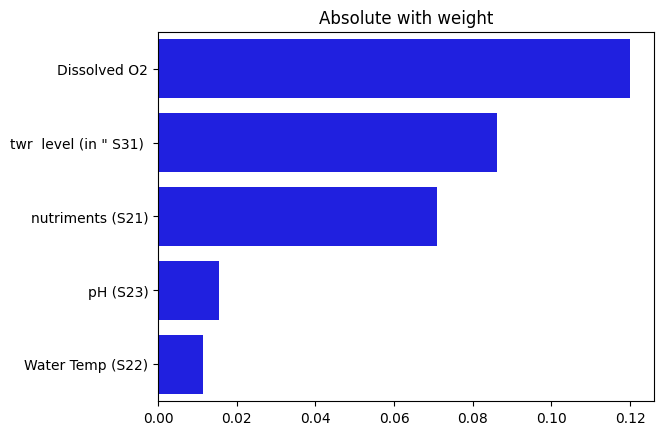

In [71]:
sns.barplot(x=abs_corrsort.values, 
            y=abs_corrsort.index, color='b').set(title='Absolute with weight');

In [59]:
dfXy_g1

,Harvest date:,nutriments (S21),Water Temp (S22),pH (S23),"twr level (in "" S31)",Dissolved O2,Transplant date:,Level location:,Total floats harvested:,Product:,Total weight for floats: (grams),Avg weight per plant:
0,2021-09-08,1.749672,67.853625,5.806048,14.214399,5.366157,2021-08-18,Level 5,10,Romaine (Dragoon),6559.0,9.55
1,2021-09-08,1.749672,67.853625,5.806048,14.214399,5.366157,2021-08-18,Level 5,10,Romaine (Dragoon),6559.0,9.55
2,2021-09-09,1.750407,67.891956,5.796365,14.213078,5.333069,2021-08-19,Level 3,10,Lettuce (Muir),19596.0,27.22
3,2021-09-09,1.750407,67.891956,5.796365,14.213078,5.333069,2021-08-19,Level 1,32,Lettuce (Muir),57420.0,25.51
4,2021-09-09,1.750407,67.891956,5.796365,14.213078,5.333069,2021-08-19,Level 6,1,Kale (Starbor),865.0,12.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,2022-04-13,1.681658,67.667229,5.792741,14.044121,3.534568,2022-03-23,Level 7,11,Lettuce (Muir),20906.0,26.40
1449,2022-04-13,1.681658,67.667229,5.792741,14.044121,3.534568,2022-03-23,Level 4,8,Kale (Starbor),5754.0,9.99
1450,2022-04-13,1.681658,67.667229,5.792741,14.044121,3.534568,2022-03-23,Level 7,6,Kale (Starbor),4063.0,9.41
1451,2022-04-13,1.681658,67.667229,5.792741,14.044121,3.534568,2022-03-23,Level 3,12,Kale (Starbor),9642.0,11.17


In [47]:
X_g1 = dfXy_g1.drop(['Harvest date:', 'Transplant date:', 'Total floats harvested:','Total weight for floats: (grams)', 'Avg weight per plant:', "Product:"], axis=1)

In [48]:
X_g1.head(1)

,nutriments (S21),Water Temp (S22),pH (S23),"twr level (in "" S31)",Dissolved O2,Level location:
0,1.749672,67.853625,5.806048,14.214399,5.366157,Level 5


In [49]:
X_g1.describe().T

,count,mean,std,min,25%,50%,75%,max
nutriments (S21),1453.0,1.762895,0.024006,1.670357,1.764717,1.768488,1.776594,1.782315
Water Temp (S22),1453.0,67.919629,0.282393,67.549057,67.700649,67.880536,68.083925,68.608343
pH (S23),1453.0,5.763140,0.108500,5.425905,5.787895,5.798772,5.810318,5.822409
"twr level (in "" S31)",1453.0,14.135865,0.111032,13.869802,14.138191,14.163014,14.188540,14.339970
Dissolved O2,1453.0,3.394046,0.841683,1.224324,2.955562,3.422649,3.855908,5.366157


In [50]:
y_g1 = dfXy_g1["Avg weight per plant:"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_g1, y_g1, test_size = 0.2)

In [60]:
X_train

,nutriments (S21),Water Temp (S22),pH (S23),"twr level (in "" S31)",Dissolved O2,Level location:
752,1.780067,67.705797,5.809989,14.166377,3.591349,Level 7
956,1.780323,67.882065,5.811700,14.139322,3.282117,Level 3
812,1.782315,67.758186,5.808457,14.167205,3.439135,Level 4
1174,1.764379,68.108441,5.820973,13.909901,2.544364,Level 7
1252,1.773625,67.599503,5.799305,14.232800,1.939086,Level 2
...,...,...,...,...,...,...
641,1.765710,67.576409,5.468643,14.157390,3.912871,Level 1
879,1.778446,67.838790,5.810282,14.139645,3.328123,Level 3
1430,1.678848,67.656802,5.796643,14.035194,3.475631,Level 4
1089,1.765223,68.092254,5.819891,13.912115,2.615781,Level 3


In [52]:
# sns.pairplot(data=dfXy_g1.drop(['Harvest date:', 'Transplant date:', 'Total floats harvested:','Avg weight per plant:'], axis=1), kind='reg', diag_kind='hist', corner=True);

In [61]:
num_transformer = make_pipeline(MinMaxScaler())
num_col = make_column_selector(dtype_include=['float64'])

cat_transformer = OneHotEncoder()
cat_col = make_column_selector(dtype_include=['object','bool'])

preproc = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col),
    remainder='passthrough')

In [62]:
pipe_baseline = make_pipeline(preproc, LinearRegression())

In [63]:
pipe_baseline.fit(X_train, y_train)
y_pred = pipe_baseline.predict(X_test)
pipe_baseline_r2 = r2_score(y_test, y_pred)
pipe_baseline_mae = mean_absolute_error(y_test, y_pred)
pipe_baseline_mse = mean_squared_error(y_test, y_pred, squared=False)

In [64]:
print(f"r2: {pipe_baseline_r2},\nmae: {pipe_baseline_mae}, \nmse: {pipe_baseline_mse}")

r2: 0.027991154220038283,
mae: 5.535670103092783, 
mse: 6.823004145316806


In [65]:
# X_train_preproc = preproc.fit_transform(X_train)
# X_test_preproc = preproc.transform(X_test)
# tpot = TPOTRegressor(generations=8, population_size=20, verbosity=2, scoring='r2', n_jobs=-1, cv=5)
# tpot.fit(X_train_preproc, y_train)
# print(tpot.score(X_test_preproc, y_test))